In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
from scipy.stats import linregress
from config import weather_api_key
from citipy import citipy

results = "results/results.csv"

fahr = "imperial"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={fahr}&q="

In [3]:
coords = []
cities = []

lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lng = np.random.uniform(low=-180.000, high=180.000, size=1500)
coords = zip(lat, lng)

for coord in coords:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    
    if city not in cities:

        cities.append(city)

len(cities)

635

In [4]:
city_list = []
country = []
clouds = []
dates = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
count = 1

#Loop through the cities in the city list 
for city in cities:  
    
    try: 
        response = requests.get(f"{url}{city}").json() 
        city_list.append(response["name"])
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        dates.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name = response["name"]
        print(f"Processing Record {count} | {city_name}")
        
        count= count + 1
        
        # Wait a second in loop to not over exceed rate limit of API
       # time.sleep(1.01)
        
    except:
        print("City not found. Trying something else.")
    continue

Processing Record 1 | Hobart
Processing Record 2 | Qaanaaq
Processing Record 3 | Cherskiy
Processing Record 4 | Praia da Vitória
Processing Record 5 | Cape Town
Processing Record 6 | Coahuayana Viejo
Processing Record 7 | Longyearbyen
Processing Record 8 | Huarmey
Processing Record 9 | Bethel
Processing Record 10 | Souillac
Processing Record 11 | Udachny
Processing Record 12 | Rurrenabaque
Processing Record 13 | Yeppoon
Processing Record 14 | Dikson
Processing Record 15 | Kapaa
Processing Record 16 | Cap Malheureux
City not found. Trying something else.
Processing Record 17 | Ponta do Sol
Processing Record 18 | Paamiut
Processing Record 19 | Airai
Processing Record 20 | Ushuaia
Processing Record 21 | George Town
Processing Record 22 | Barra de Tecoanapa
Processing Record 23 | Uberaba
City not found. Trying something else.
Processing Record 24 | Mataura
Processing Record 25 | Zeya
Processing Record 26 | Deloraine
Processing Record 27 | Rosarito
Processing Record 28 | Clyde River
Process

In [5]:
results_dict = {'City':city_list,
                'Cloudiness':clouds,
                'Country':country,
                'Date':dates,
                'Humidity':humidity,
                'Lat':lat,
                'Lng':lng,
                'Max Temp':max_temp,
                'Wind Speed':wind_speed}

#Turn dictionary into dataframe
results_df = pd.DataFrame(results_dict)

In [6]:
export_csv = results_df.to_csv (results, index = None, header=True)

results_df.count()

City          589
Cloudiness    589
Country       589
Date          589
Humidity      589
Lat           589
Lng           589
Max Temp      589
Wind Speed    589
dtype: int64

In [7]:
results_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hobart,75,AU,1651889741,91,-42.8794,147.3294,53.46,16.11
1,Qaanaaq,100,GL,1651889742,83,77.4840,-69.3632,13.08,3.60
2,Cherskiy,100,RU,1651889742,100,68.7500,161.3000,32.68,3.47
3,Praia da Vitória,31,PT,1651889549,85,38.7333,-27.0667,57.76,6.40
4,Cape Town,75,ZA,1651889703,88,-33.9258,18.4232,57.90,11.99


# Scatter Plots

## Temperature (F) vs. Latitude

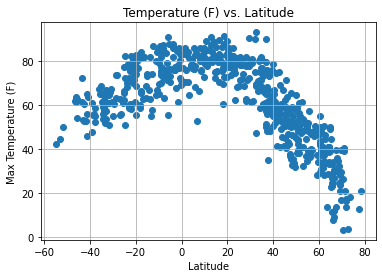

In [8]:
temp_lat_plt = plt.scatter(results_df['Lat'],results_df['Max Temp'],marker='o')
plt.grid()
plt.title('Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('results/Figure_1.png')
plt.show()

## Humidity (%) vs. Latitude

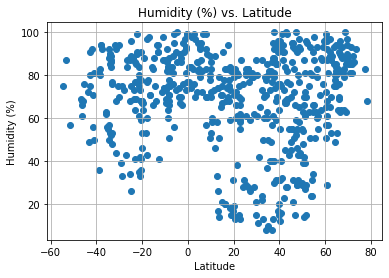

In [9]:
hum_lat_plt = plt.scatter(results_df['Lat'],results_df['Humidity'],marker='o')
plt.grid()
plt.title('Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('results/Figure_2.png')
plt.show()

## Cloudiness (%) vs. Latitude

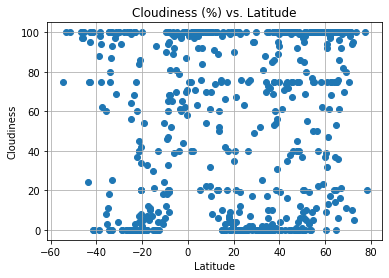

In [10]:
cld_lat_plt = plt.scatter(results_df['Lat'],results_df['Cloudiness'],marker='o')
plt.grid()
plt.title('Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('results/Figure_3.png')
plt.show()

## Wind Speed (mph) vs. Latitude

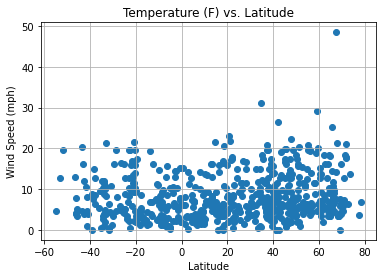

In [11]:
wind_lat_plt = plt.scatter(results_df['Lat'],results_df['Wind Speed'],marker='o')
plt.grid()
plt.title('Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('results/Figure_4.png')
plt.show()

# Linear Regressions

## Northern Hemisphere - Temperature (F) vs. Latitude

In [12]:
n_hemi_df = results_df[results_df['Lat'] >= 0]
s_hemi_df = results_df[results_df['Lat'] < 0]

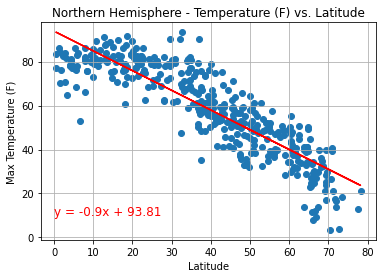

In [13]:
x = n_hemi_df['Lat']
y = n_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

n_temp_plt = plt.scatter(x,y,marker='o')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, xy=(0,10),fontsize=12,color='red')
plt.grid()
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('results/Figure_5.png')
plt.show()

## Southern Hemisphere - Temperature (F) vs. Latitude

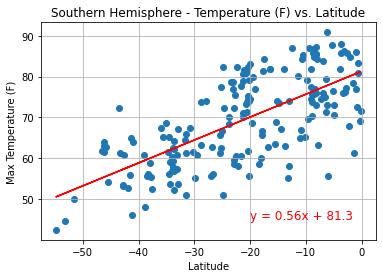

In [14]:
x = s_hemi_df['Lat']
y = s_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

s_temp_plt = plt.scatter(x,y,marker='o')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, xy=(-20,45),fontsize=12,color='red')
plt.grid()
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('results/Figure_6.png')
plt.show()

* There is a clear correlation between latitude and max temperatures. The max temps reduce the farther away you measure from the equator. There is a slightly larger correlation in the northern hemisphere vs the southern, but I suspect this is due to many more data points (i.e. cities) on the northern hemisphere due to the distribution of landmasses on the planet.

## Northern Hemisphere - Humidity (%) vs. Latitude

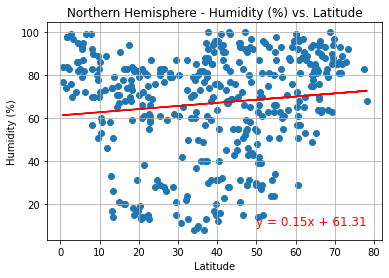

In [15]:
x = n_hemi_df['Lat']
y = n_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

n_hum_plt = plt.scatter(x,y,marker='o')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, xy=(50,10),fontsize=12,color='red')
plt.grid()
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('results/Figure_7.png')
plt.show()

## Southern Hemisphere - Humidity (%) vs. Latitude

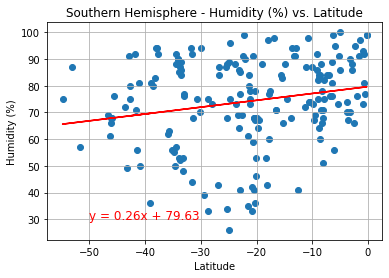

In [16]:
x = s_hemi_df['Lat']
y = s_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

n_hum_plt = plt.scatter(x,y,marker='o')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, xy=(-50,30),fontsize=12,color='red')
plt.grid()
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('results/Figure_8.png')
plt.show()

* There is not a strong correlation between latitude and humidity percentages. According to these data, the humitidy percentage can be expected to increase as you go north, but with no relation to the equator. this may be due to the same reasons as above, or another unknown factor such as global warming and pollution being heavier in the northern hemisphere.

## Northern Hemisphere - Cloudiness (%) vs. Latitude

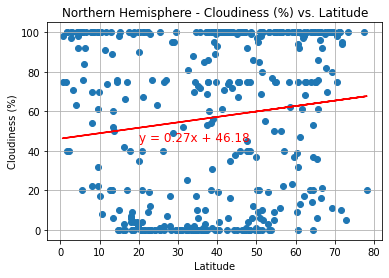

In [17]:
x = n_hemi_df['Lat']
y = n_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

n_hum_plt = plt.scatter(x,y,marker='o')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, xy=(20,45),fontsize=12,color='red')
plt.grid()
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('results/Figure_9.png')
plt.show()

## Southern Hemisphere - Cloudiness (%) vs. Latitude

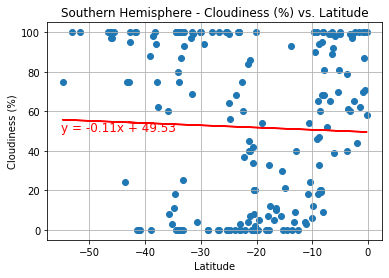

In [18]:
x = s_hemi_df['Lat']
y = s_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

n_hum_plt = plt.scatter(x,y,marker='o')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, xy=(-55,50),fontsize=12,color='red')
plt.grid()
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('results/Figure_10.png')
plt.show()

* There isnot astrong correlation between latitude and percentage of cloudiness. As above, these data show an increase in cloudiness as you travel north, with no relation to the equator. the same reasonings above are my best explanations for these results.

## Northern Hemisphere - Wind Speed (mph) vs. Latitude

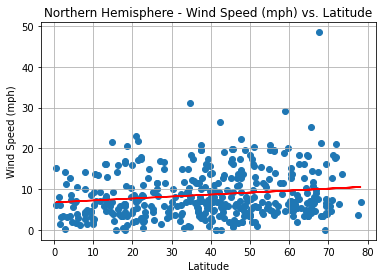

In [19]:
x = n_hemi_df['Lat']
y = n_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

n_hum_plt = plt.scatter(x,y,marker='o')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, xy=(-55,50),fontsize=12,color='red')
plt.grid()
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('results/Figure_11.png')
plt.show()

## Southern Hemisphere - Wind Speed (mph) vs. Latitude

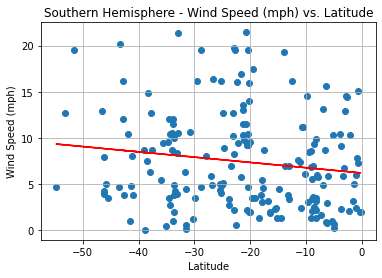

In [20]:
x = s_hemi_df['Lat']
y = s_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

n_hum_plt = plt.scatter(x,y,marker='o')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, xy=(-55,50),fontsize=12,color='red')
plt.grid()
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('results/Figure_12.png')
plt.show()

* There is a slight correlation between latitude and wind speeds. The wind speeds increase as you travel away from the equator, but only in miniscule amounts. This may be due to the coriolis effect, or any number of other unknown factors. 